In [1]:
#Setting working path required for relative package loading

import os
os.chdir("/home/tales/ds/walmart-recruiting-store-sales-forecasting/")
print("working dir:", "\'" + os.getcwd() + "\'")

working dir: '/home/tales/ds/walmart-recruiting-store-sales-forecasting'


In [2]:
import pandas as pd

from src.data import dao
from src.utils import pretties, time_utils, stats
from src.visualization import plot
from bokeh.plotting import show, output_notebook

In [3]:
pretties.max_data_frame_columns()
pretties.decimal_notation()
output_notebook()

Loading BokehJS ...

# walmart-recruiting-store-sales-forecasting
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

In [4]:
feat = dao.load_features()
feat = dao.features_semantic_enrichment(feat)

In [5]:
feat.shape

(8190, 16)

In [6]:
feat.sample(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,timestamp,Temperature_Celsius,datetime,day_n
58,1,2011-03-18,62.76,3.49,nan,nan,nan,nan,nan,214.36,7.74,False,1300417200.00,17.09,2011-03-18,18
3680,21,2010-11-12,60.95,2.73,nan,nan,nan,nan,nan,211.66,8.16,False,1289530800.00,16.08,2010-11-12,12
7974,44,2012-12-07,43.67,3.46,31.56,nan,nan,nan,630.65,131.48,5.22,False,1354849200.00,6.48,2012-12-07,7
768,5,2010-11-12,62.37,2.73,nan,nan,nan,nan,nan,212.56,6.77,False,1289530800.00,16.87,2010-11-12,12
7838,44,2010-04-30,48.33,2.94,nan,nan,nan,nan,nan,126.38,7.97,False,1272596400.00,9.07,2010-04-30,30


# <font color="navy">Temperature</font>
average temperature in the region

In [7]:
grouped_sales = feat.groupby("Date")["Celsius"].median()
p = plot.plot_time_series_count(grouped_sales.index, grouped_sales, color="navy", title="Temperature vs Datetime", relative_y_axis=True)
show(p)

/home/tales/anaconda3/lib/python3.7/site-packages/bokeh/plotting/helpers.py:628: UserWarning: WheelZoomTool are being repeated
  warnings.warn("%s are being repeated" % ",".join(repeated_tools))


# <font color="navy">Fuel_Price</font>
cost of fuel in the region

In [8]:
feat["Fuel_Price"].plot.hist()

# <font color="navy">CPI</font>
he consumer price index <br>
A Consumer Price Index measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households. 
https://en.wikipedia.org/wiki/Consumer_price_index

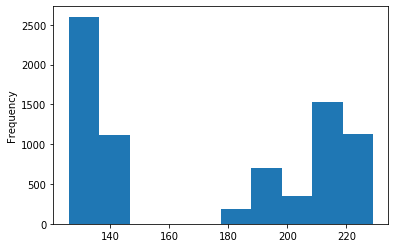

In [9]:
feat["CPI"].plot.hist()

# <font color="navy">Unemployment</font>
the unemployment rate

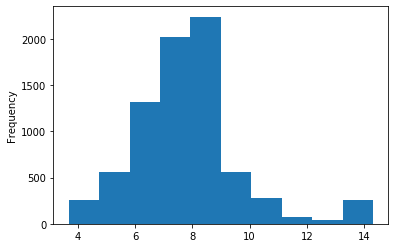

In [10]:
feat["Unemployment"].plot.hist()

# <font color="navy">Day of month</font>

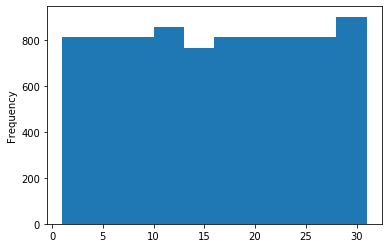

In [11]:
feat["day_n"].plot.hist()